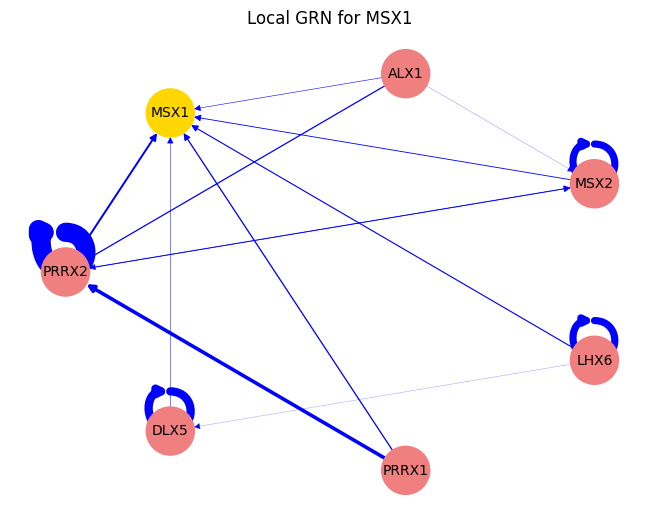

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

def plot_local_grn2(df, node_of_interest):
    import networkx as nx
    import matplotlib.pyplot as plt

    tf_genes = set(df['TF'])

    # Get direct targets and regulators
    targets = set(df[df['TF'] == node_of_interest]['Gene'])
    regulators = set(df[df['Gene'] == node_of_interest]['TF'])
    bidirectional = targets & regulators  # Set intersection

    # Build the local set (include the node itself)
    local_nodes = set([node_of_interest]) | targets | regulators

    # Subset: keep only edges where both nodes are in local_nodes
    local_edges = df[df['TF'].isin(local_nodes) & df['Gene'].isin(local_nodes)]

    # FILTER TO KEEP ONLY THOSE THAT ARE ALSO TF 
    # ...except keep the gene of interest in the target column
    local_edges = local_edges[(local_edges['Gene'].isin(tf_genes)) | (local_edges['Gene'] == node_of_interest)]

    # Create the graph
    G = nx.DiGraph()
    for _, row in local_edges.iterrows():
        color = 'blue' if row['regulation'] == 1 else 'red'
        width = abs(row['importance_TF2G'] * row['rho_TF2G'])
        G.add_edge(row['TF'], row['Gene'], color=color, weight=width)

    # Prepare colors
    node_colors = []
    for n in G.nodes():
        if n == node_of_interest:
            node_colors.append('gold')
        elif n in bidirectional:
            node_colors.append('thistle')        # Both target and regulator
        elif n in targets:
            node_colors.append('deepskyblue')   # Only target
        elif n in regulators:
            node_colors.append('lightcoral')    # Only regulator
        else:
            node_colors.append('lightgrey')     # Others

    edge_colors = [G[u][v]['color'] for u, v in G.edges()]
    edge_widths = [G[u][v]['weight'] * 1 for u, v in G.edges()]

    pos = nx.shell_layout(G)

    nx.draw(
        G, pos, with_labels=True, edge_color=edge_colors, arrows=True,
        width=edge_widths, node_color=node_colors, node_size=1200, font_size=10
    )
    plt.title(f"Local GRN for {node_of_interest}")
    plt.savefig('MSX1_total_eGRN.pdf', format='pdf')



#df = pd.read_csv('eRegulons_total.csv')
df = pd.read_csv('extended_ranked_2mb.csv')
plot_local_grn2(df, 'MSX1')
#plt.close()


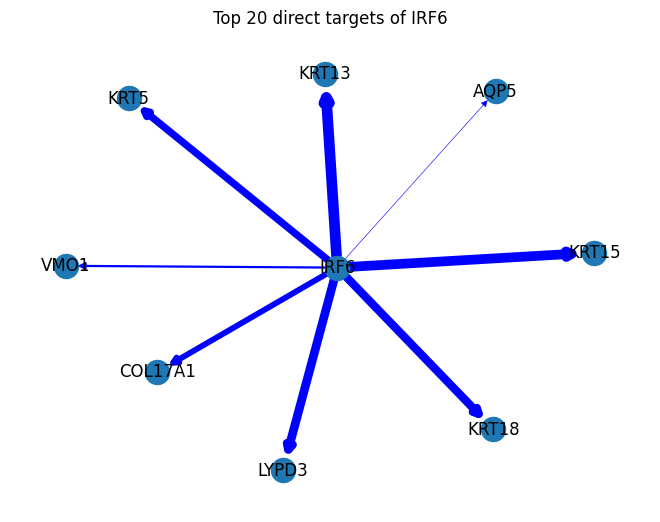

In [8]:
df = pd.read_csv('direct_ranked_spatial.csv')

tf_of_interest = 'IRF6'

subset = df[df['TF'] == tf_of_interest].copy()

# Take top 20 by importance only
subset_top = subset.nlargest(20, 'importance_TF2G')

# Build the graph from these
G = nx.DiGraph()
for _, row in subset_top.iterrows():
    color = 'blue' if row['regulation'] == 1 else 'red'
    width = abs(row['importance_TF2G'] * row['rho_TF2G'])
    G.add_edge(row['TF'], row['Gene'], color=color, weight=width)

edge_colors = [G[u][v]['color'] for u, v in G.edges()]
edge_widths = [G[u][v]['weight'] * 5 for u, v in G.edges()]

nx.draw(
    G, with_labels=True, edge_color=edge_colors, arrows=True,
    width=edge_widths
)
plt.title(f"Top 20 direct targets of {tf_of_interest}")
plt.show()
